## Esame Metodi Numerici  4 Luglio 2024 - Turno I Ore 9

# Esercizio 1

Si consideri il sistema lineare:

     A  x = b 

dove A è la matrice dei coefficienti, b è il termine noto, ed x è il vettore delle incognite da determinare.
I dati di questo sistema lineare sono contenuti nel file **testI.mat**.

- Si implementino e si testino sui dati forniti due metodi che sono adatti a risolvere tale sistema lineare con le caratteristiche delle matrici dei coefficienti date in input.
                                      **[punti 7]**
- Si confrontino i risultati ottenuti e si giustifichino utilizzando  e richiamando gli aspetti teorici dei metodi implementati.
                                      **[punti 2]**

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('testI')``

``A=dati["A"] ``

``A=A.astype(float)``

`` b=dati["b"] ``

`` b=b.astype(float)``

In [5]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from SolveTriangular import *
import scipy as sp
dati = loadmat('testI')
A=dati["A"] 
A=A.astype(float)
b=dati["b"]
b=b.astype(float)

In [8]:
n,m = A.shape
if m==n:
    print("matrice quadrata, dim:", m)
else:
    print("matrice non quadrata")
print("COndizionamento di A: ", np.linalg.cond(A))

matrice quadrata, dim: 400
COndizionamento di A:  398.0942877444178


Sparsità:  0.116775


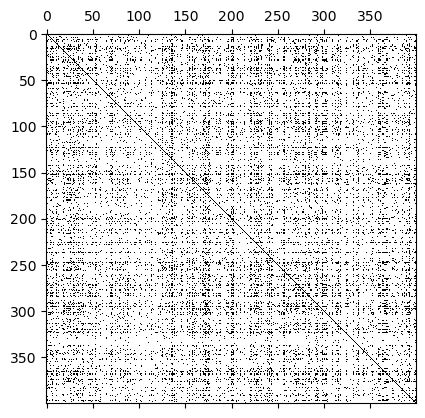

In [16]:
sp=np.count_nonzero(A)/(m*n)
print("Sparsità: ", sp)
plt.spy(A)

In [17]:
flagS= A==A.T
if np.all(flagS==True):
    print("matrice simmetrica")
else: 
    print("matrice non simmetrica")

matrice non simmetrica


In [18]:
def is_strictly_diagonally_dominant(A):
    for i in range(A.shape[0]):
        diag = abs(A[i, i])
        off_diag_sum = np.sum(np.abs(A[i, :])) - diag
        if diag <= off_diag_sum:
            return False
    return True

# Uso:
if is_strictly_diagonally_dominant(A):
    print("La matrice è diagonalmente strettamente dominante")
else:
    print("La matrice NON è diagonalmente strettamente dominante")

La matrice è diagonalmente strettamente dominante


In [ ]:

def jacobi(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    n=A.shape[0]
    invM=np.diag(1/d)
    E=np.tril(A, 1)
    F=np.triu(A,-1)
    N=-(E+F)
    T=invM@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori)) 
    print("raggio spettrale jacobi", raggiospettrale)
    it=0
    
    er_vet=[]
    while it<=it_max and errore>=toll:
        x=(b+N@x0)/d.reshap(n,1)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet


def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.linalg.inv(M)@N 
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore >=toll:
        x,flag=Lsolve(M, b-F@x0)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

def gauss_seidel_sor(A,b,x0,toll,it_max,omega):
    errore=1000
    d=np.diag(d)
    D=np.diag(A) 
    E=np.tril(A,-1) 
    F=np.triu(A,1)
    Momega=D+omega*E
    Nomega=(1-omega)*D-omega*F
    T=np.linalg.inv(Momega)@Nomega
    autovalori=np.linalg.eigvals(T)
    raggiospettrale= np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel SOR ", raggiospettrale)
    
    M=D+E
    N=-F
    it=0
    xold=x0.copy()
    xnew=x0.copy()
    er_vet=[]
    while it<=it_max and errore>=toll:
        
        xtilde,flag=Lsolve(M, b-F@xold) 
        xnew=(1-omega)*xold+omega*xtilde
        errore=np.linalg.norm(xnew-xold)/np.linalg.norm(xnew)
        er_vet.append(errore)
        xold=xnew.copy()
        it=it+1
    return xnew,it,er_vet



- Data la matrice
$$
\left[
\begin{array}{cccc}
3.0 &2.0 & 1.0 & -1.0\\
4.0 & 6.0 & 3.0 & 2.0\\
2.0 & 1.0 & 4.0 & 3.0\\
1.0 & 4.0 & 2.0 & 7.0
\end{array}
\right ],
$$
calcolarne la fattorizzazione lu di Gauss  facendo uso della funzione scipy.linalg.lu e:
- sfruttarla per il calcolo del suo determinante (confrontare l'esattezza del calcolo con quello ottenuto usando la funzione numpy.linalg.det)             **[punti: 2]**
- sfruttarla per il calcolo della sua inversa risolvendo n sistemi lineari (confrontare l'inversa con quella ottenuta usando la funzione numpy.linalg.inv)
                                                                                                    **[punti: 2]**

In [15]:
def LUSolve(P, A, L, U, b):
    pb=np.dot(P,b)
    y,flag=Lsolve(L, pb)
    if flag == 0:
        x, flag=Usolve(U,y)
    else:
        return [],flag
    return x, flag


A2=np.array([[3.0,2.0,2.0,-1.0],[4.0,6.0,3.0,2.0], [2.0,2.0,4.0,3.0],[1.0,4.0,2.0,7.0]])
b2=np.sum(A2, axis=1).reshape(A2.shape[0], 1)
PT,L,U = sp.linalg.lu(A2)
P=PT.T.copy()
x,flag=LUSolve(P,A2,L,U,b2)
print("X: ", x)

X:  [[1.]
 [1.]
 [1.]
 [1.]]


In [12]:
detA2=np.linalg.det(PT)*np.prod(np.diag(U))#deriva dal fatto che PA=LU e PT è la matrice di permutazione
print("determinate calcolato con LU: ", detA2)
print("determinante con np.det: ", np.linalg.det(A2))

determinate calcolato con LU:  74.0
determinante con np.det:  74.00000000000003


In [13]:
n = A2.shape[0]
I = np.eye(n)
inv_A2 = np.zeros_like(A2)

for i in range(n):
    e = I[:, i].reshape(-1, 1)  # colonna dell'identità
    x, flag = LUSolve(P, A2, L, U, e)
    inv_A2[:, i] = x.flatten()  # salva la colonna trovata

print("Inversa calcolata via LU:\n", inv_A2)
print("Inversa con numpy.linalg.inv:\n", np.linalg.inv(A2))


Inversa calcolata via LU:
 [[ 1.37837838 -0.7027027  -0.45945946  0.59459459]
 [-0.74324324  0.59459459  0.08108108 -0.31081081]
 [-0.62162162  0.2972973   0.54054054 -0.40540541]
 [ 0.40540541 -0.32432432 -0.13513514  0.35135135]]
Inversa con numpy.linalg.inv:
 [[ 1.37837838 -0.7027027  -0.45945946  0.59459459]
 [-0.74324324  0.59459459  0.08108108 -0.31081081]
 [-0.62162162  0.2972973   0.54054054 -0.40540541]
 [ 0.40540541 -0.32432432 -0.13513514  0.35135135]]


## Esercizio 2

-  Implementare il  metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii per la soluzione di un sistema non lineare
                           [**punti: 7**]

- Risolvere il sistema di equazioni non lineare 

$$
\left\{
\begin{array}{c}
x_0\cdot x_1+x_0=1 \\
 x_0^2+x_1^2=9
\end{array}
\right.
$$
con ciascuno dei tre metodi e confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi, giustificando i risultati alla luce della teoria. [**punti: 3**]

 **Nota Bene**: Servirsi del metodo grafico per individuare un 
iterato iniziale  $X^{(0)}$ nell'intorno della soluzione che si vuole approssimare.  Per fare cio',  visualizzare le 
curve di livello corrisponenti a z=0 delle due superfici $z_1 = f_1 (x_0 ,x_1 )$ e $z_2 = f_2(x_0 , x_1 )$ e 
definire come iterato iniziale un vettore $X^{(0)}=(x_0^{(0)},x_1^{(0)})$ oppurtuno le cui componenti appartengono ad un 
intorno della soluzione (cioè  dei punti di  intersezione tra le curve di livello delle due superfici) \]

- Descrivere teoricamente la variante del Metodo di Newton-Raphson per calcolare il minimo di una funzione non lineare in più variabili.

 [**punti: 2**]
 



In [17]:
def newton_raphson(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):

    X= np.array(initial_guess, dtype=float)
    it=0
    
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it<= max_iterations and erroreX>= tolX and erroreF>= tolF:
        jx = J_Numerical(X[0], X[1])
        
        if np.linalg.det(jx)==0:
            print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
            return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx, -fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(Xnew-x)/normaXnew
        else:
            erroreX=np.linalg.norm(Xnew-X)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore


In [18]:
def newton_raphson_corde(initial_guess, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    

    X= np.array(initial_guess, dtype=float)
    it=0
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it<=max_iterations and erroreF >=tolF and erroreX>=tolX:
        
        if it==0:
            jx = J_Numerical(X[0],X[1])
        
            if np.linalg.det(jx)==0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx)
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s)/normaXnew
        else:
            erroreX=np.linalg.norm(s)
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0], Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1
    
    return X,it,errore


In [20]:

def newton_raphson_sham(initial_guess, update, F_numerical, J_Numerical, tolX, tolF, max_iterations):
    
    X= np.array(initial_guess, dtype=float)
    it=0
    erroreF=1+tolF
    erroreX=1+tolX
    
    errore=[]
    
    while it<=max_iterations and erroreF>=tolF and erroreX>=tolX:
        if it%update==0:
            jx = J_Numerical(X[0],X[1])
        
            if np.linalg.det(jx)==0:
                print("La matrice dello Jacobiano calcolata nell'iterato precedente non è a rango massimo")
                return None, None,None
        
        fx = F_numerical(X[0],X[1])
        fx = fx.squeeze() 
        
        s = np.linalg.solve(jx,-fx) 
        
        Xnew=X+s
        
        normaXnew=np.linalg.norm(Xnew,1)
        if normaXnew !=0:
            erroreX=np.linalg.norm(s)/normaXnew
        else:
            erroreX=np.linalg.norm(s)/normaXnew
        
        errore.append(erroreX)
        fxnew=F_numerical(Xnew[0],Xnew[1])
        erroreF= np.linalg.norm(fxnew.squeeze(),1)
        X=Xnew
        it=it+1

    return X,it,errore

X:  [0.25065734 2.98951014]
IT: 7


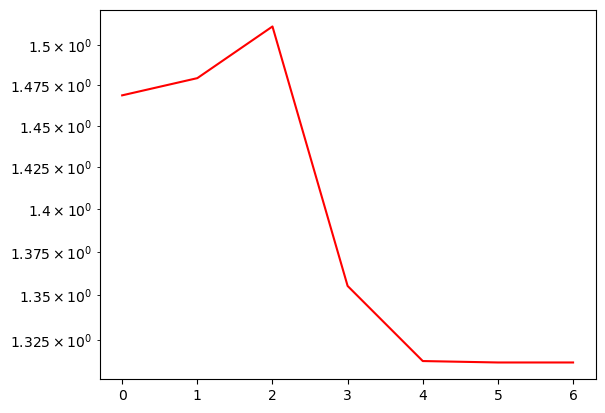

In [35]:
import matplotlib.pyplot as plt
def F_numerical(x0,x1):
    return np.array([
        x0*x1+x0-1,
        x0**2+x1**2-9
    ]).reshape(2,1)
def J_numerical(x0,x1):
    return np.array([
        [x1+1,x0],
        [2*x0,2*x1]
    ])

initial_guess=[1.0,1.0]
tolX=1e-8
tolF=1e-8
max_iterations=100
XNR,itNR,erroreNR =newton_raphson(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
plt.semilogy(np.arange(len(erroreNR)), erroreNR, 'r-')
print("X: ", XNR)
print("IT:", itNR)

X:  [ inf -inf]
IT:  10


/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_99917/2008194252.py:4: RuntimeWarning: overflow encountered in scalar multiply
  x0*x1+x0-1,
/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_99917/2008194252.py:5: RuntimeWarning: overflow encountered in scalar power
  x0**2+x1**2-9
/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_99917/4286981724.py:29: RuntimeWarning: invalid value encountered in scalar divide
  erroreX=np.linalg.norm(s)/normaXnew
/var/folders/99/94z23fnx5pbdypv066f46mjw0000gn/T/ipykernel_99917/2008194252.py:4: RuntimeWarning: invalid value encountered in scalar add
  x0*x1+x0-1,


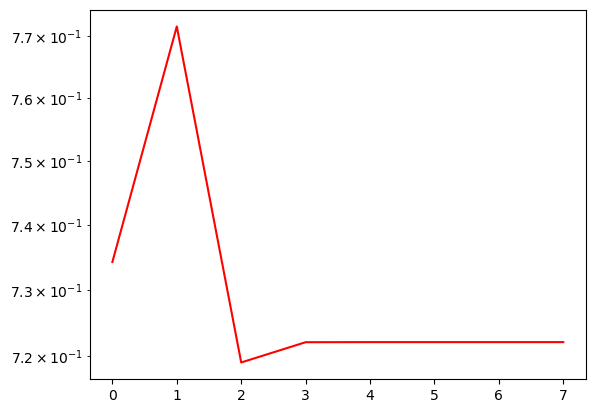

In [34]:
initial_guess=[1.0,1.0]
tolX=1e-8
tolF=1e-8
max_iterations=100
X_corde,it_corde,errore_corde=newton_raphson_corde(initial_guess, F_numerical, J_numerical, tolX, tolF, max_iterations)
plt.semilogy(np.arange(len(errore_corde)), errore_corde, 'r-')
print("X: ", X_corde)
print("IT: ", it_corde)

X:  [-0.51121549 -2.95612224]
IT:  34


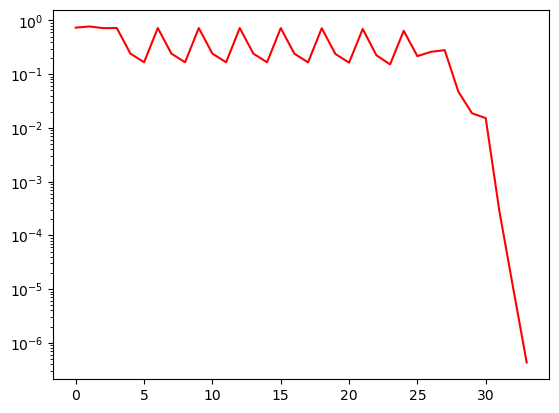

In [33]:
initial_guess=[1.0,1.0]
tolX=1e-8
tolF=1e-8
max_iterations=100
update=3
X_Sham,it_sham,errore_sham =newton_raphson_sham(initial_guess,update, F_numerical, J_numerical, tolX, tolF, max_iterations)
plt.semilogy(np.arange(len(errore_sham)), errore_sham, 'r-')
print("X: ", X_Sham)
print("IT: ", it_sham)

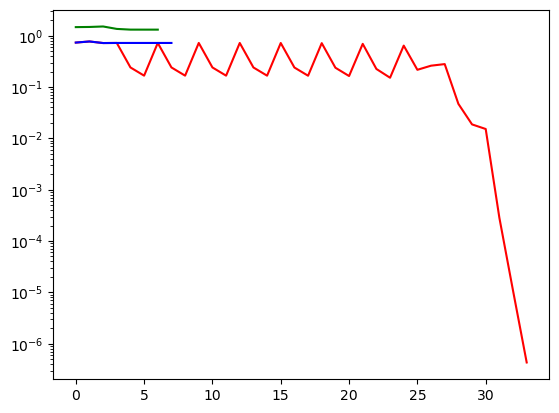

In [32]:
plt.semilogy(np.arange(len(errore_sham)), errore_sham, 'r-',np.arange(len(errore_corde)), errore_corde, 'b-', np.arange(len(erroreNR)), erroreNR, 'g-')

## Domande Intelligenza Artificiale
**NB: Ogni risposta esatta:  +0.5 punti, ogni risposta errata: -0.5 punti. La mancanza di risposta:  0 punti**

Domande a risposta multipla

**1.** Quali sono i passaggi fondamentali all’interno del paradigma generale dell’Intelligenza Artificiale?

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione e metriche

•	Data Processing, Addestramento del Modello, Predizione, Analisi economica dei risultati

•	Acquisizione dati, Data Processing, Addestramento del modello, Predizione, Test di Turing

•	Acquisizione dati, Addestramento del Modello, Test di Turing, Predizione


**2.** Per una rete neurale, l’apprendimento è legato a:

•	Minimizzare la funzione obiettivo

•	Minimizzare la funzione di attivazione

•	Massimizzare il valore dei pesi tramite l’algoritmo di back-propagation

•	Massimizzare il valore della funzione di training


**3.**  Il Test di Turing serve a:

•	Valutare se una macchina dimostra un comportamento intelligente

•	Valutare il carico computazionale di un algoritmo di Intelligenza Artificiale

•	Valutare la velocità di risposta di un algoritmo di Intelligenza Artificiale

•	Valutare se una macchina dimostra un comportamento predicibile


**4.**
Le ultime e più recenti innovazioni nel campo dell’Intelligenza Artificiale sono:

•	CNN, GAN e Transformers

•	Expert Systems, CNN e GAN

•	Expert Systems, Deep Learning e CNN

•	CNN, Expert Systems e Transformers


**5.** A cosa serve il validation set?

•	A trovare i migliori iperparametri del modello

•	Ad addestrare il modello 

•	A testare il modello

•	A trovare le etichette dei dati di input


**Domande aperte**

Quale è il ruolo del learning rate nella formula di aggiornamento dei pesi mediante gradient descent. Aggiornamento del learning rate programmato (learning rate scheduling) : step decay, decadimento esponenziale, decadimento dipendente dal tempo. **[punti 2]**


Learning rate adattivo per ogni peso (durante il processo di ottimizzazione) : Adagrad, RMSProp, Adadelta, Adam. (formula di aggiornamento dei pesi e discussioni)
**[punti 2.5]**